In [27]:
#Harris corner detector : sharp and soft

import cv2
import numpy as np

img = cv2.imread('lena.png')
img2 = img.copy()
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# To detect only sharp corners
dst = cv2.cornerHarris(gray, blockSize=3, ksize=5, k=0.04)
print(dst.shape)
# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.05*dst.max()] = [255,0,0]
cv2.imshow('1Harris Corners(only sharp)',img)

# to detect soft corners
dst = cv2.cornerHarris(gray, blockSize=9, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)
img2[dst > 0.05*dst.max()] = [0,255,0]
cv2.imshow('2Harris Corners(also soft)',img2)

cv2.waitKey()
cv2.destroyAllWindows()

(512, 512, 3)
(512, 512)


In [22]:
#Harris corner detector with mouse cursor

import cv2
import numpy as np

def mouse_callback(event, _x, _y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.rectangle(img, (10, 0), (224, 30), (255, 255, 255), -1)
        show_str = 'x:{} y:{} '.format(_x, _y)
        cv2.putText(img, show_str, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)
        cv2.imshow('image',img)
 
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

img = cv2.imread('lena.png')
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# To detect only sharp corners
dst = cv2.cornerHarris(gray, blockSize=5, ksize=5, k=0.04)
print(dst.shape)
# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.09*dst.max()] = [0,255,0]
cv2.imshow('image',img)
print(dst.max())

cv2.waitKey()
cv2.destroyAllWindows()

(512, 512, 3)
(512, 512)
1409653600.0


In [26]:
#good feature to track

import cv2
import numpy as np

img = cv2.imread('lena.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, maxCorners=30, qualityLevel=0.04, minDistance=2)
corners = np.float32(corners)
for item in corners:
    print(item)
    x, y = item[0]
    cv2.circle(img, (x,y), 5, (255,0,0), -1)
    
cv2.imshow("Top 'k' features", img)
cv2.waitKey()
cv2.destroyAllWindows()

[[180. 433.]]
[[157. 377.]]
[[113. 269.]]
[[141. 245.]]
[[ 70. 415.]]
[[174. 311.]]
[[166. 467.]]
[[232. 235.]]
[[148. 327.]]
[[273. 263.]]
[[332. 263.]]
[[ 78. 385.]]
[[286. 176.]]
[[270. 197.]]
[[139. 281.]]
[[334. 202.]]
[[138. 353.]]
[[294. 323.]]
[[157.  68.]]
[[165. 413.]]


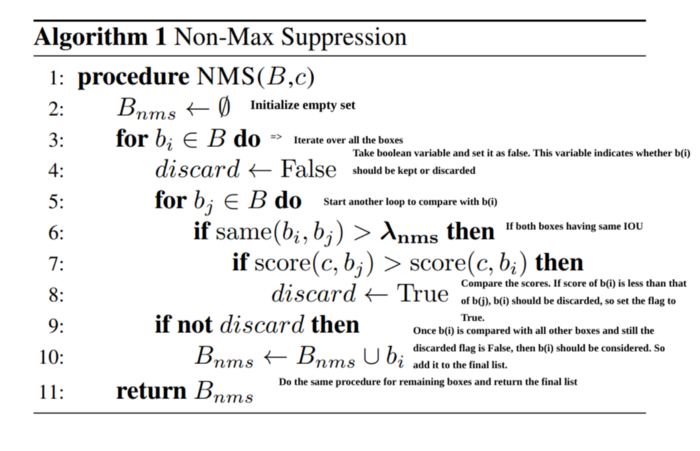
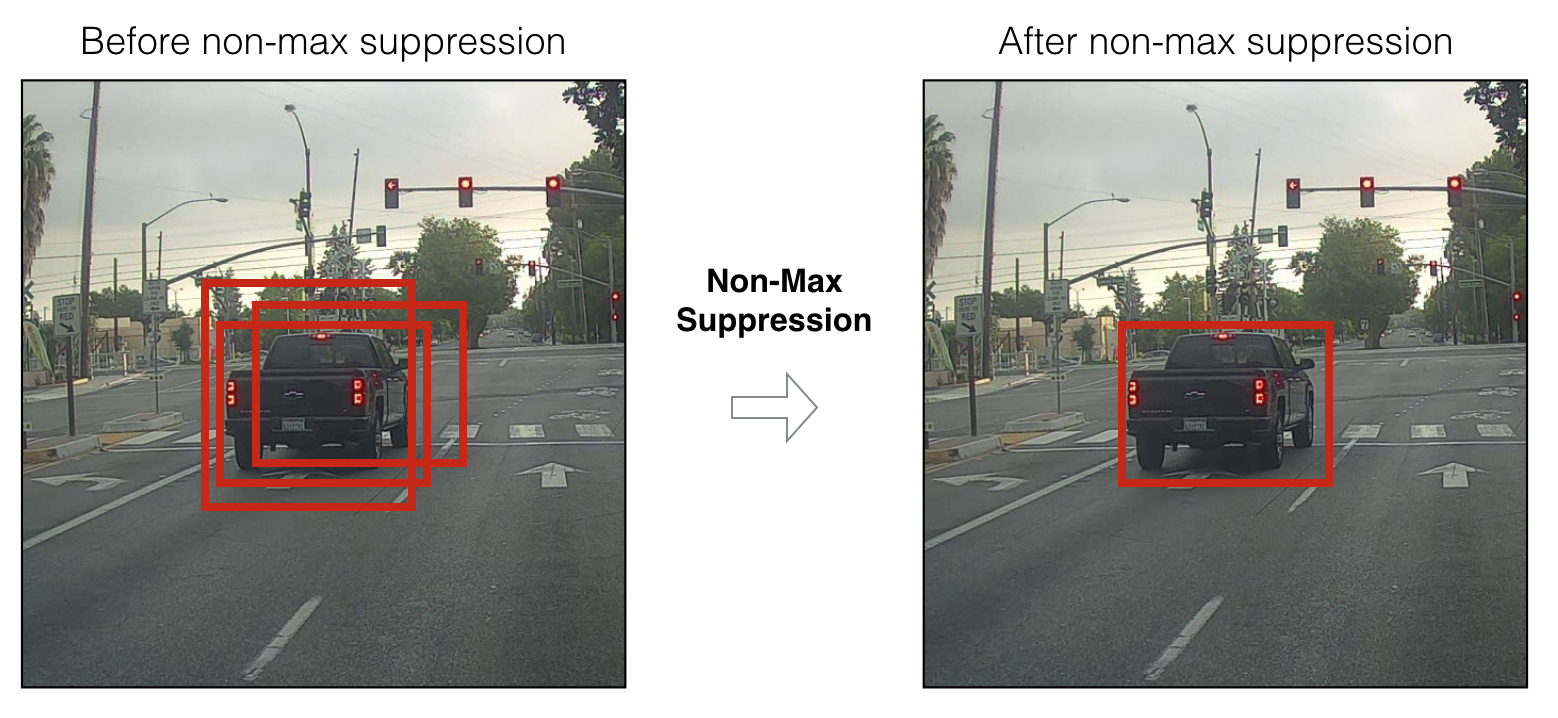
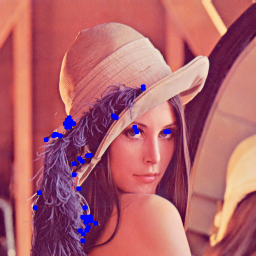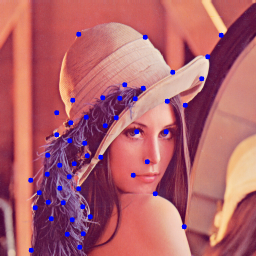

###### %%writefile test
## Practice
1. Input images from webcam.
2. Use <i>cv2.cornerHarris()</i> to detect corners.
3. Use <i>cv2.putText()</i> to show the response value of Harris detector of the location under mouse cursor.
4. Bonus: perfrom <b>non-maximum suppressing</b>.
5. Show the output image.
6. Observe which face features are more robust under translation, rotation, scaling, illumination, and facial expressions. 
7. Upload your Jupyter code file (*.ipynb)